In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# define the corpus
corpus = [
    'The cat sat on the mat',
    'The dog ran in the park',
    'The bird sang in the tree'
]

In [4]:
# let's create the CBOW model having window size = 2

In [3]:
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print('After converting the words in the corpus into vector of integers: ')
print(sequences)

After converting the words in the corpus into vector of integers: 
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [14]:
print(len(tokenizer.word_index) + 1)

13


In [64]:
# Now i'll build the CBOW model having window size = 2
# Defining the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
  for i in range(window_size, len(sequence) - window_size):
    context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
    target = sequence[i]
    contexts.append(context)
    targets.append(target)


In [43]:
print(sequences)

[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [51]:
for sequence in sequences:
  for i in range(window_size, len(sequence) - window_size):
    print(sequence[i + 1:i + window_size + 1])


[5, 1]
[1, 6]
[2, 1]
[1, 9]
[2, 1]
[1, 12]


In [24]:
print(sequences)

[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [37]:
sequence = [3, 4, 5, 6]
for i in sequence:
  print(sequence[i-2:i])

3
[4, 5]
[5, 6]
[6]
[]


In [23]:
for sequence in sequences:
  for i in range(window_size, len(sequence) - window_size):
    print(sequence[i - window_size:i])

[1, 3]
[3, 4]
[1, 7]
[7, 8]
[1, 10]
[10, 11]


In [ ]:
print(embedding_size)

In [6]:
print(targets)
print(contexts)

[4, 5, 8, 2, 11, 2]
[[1, 3, 5, 1], [3, 4, 1, 6], [1, 7, 2, 1], [7, 8, 1, 9], [1, 10, 2, 1], [10, 11, 1, 12]]


In [39]:
X = np.array(contexts)
y = to_categorical(targets, num_classes = vocab_size)

In [53]:
to_categorical(targets)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
print(X)
print(y)

[[ 1  3  5  1]
 [ 3  4  1  6]
 [ 1  7  2  1]
 [ 7  8  1  9]
 [ 1 10  2  1]
 [10 11  1 12]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [57]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

13


In [63]:
print(vocab_size)
print(embedding_size)

13
10


In [65]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 12), output.shape=(None, 13)

In [62]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 12), output.shape=(None, 13)

In [126]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA

In [71]:
# defining the corpus
corpus = [
    'My name is shiva chaudhary',
    'I live in Nepal, kathmandu',
    'I have passion for machine learning',
    'I love posting on linkedin daily about machine learning',
    'I aspire to be Machine Learning engineer in future and earn lot of money',
    'I also love talking to strangers and making friends',
    'i hate when someone becomes too personal'
]
print(corpus)

['My name is shiva chaudhary', 'I live in Nepal, kathmandu', 'I have passion for machine learning', 'I love posting on linkedin daily about machine learning', 'I aspire to be Machine Learning engineer in future and earn lot of money', 'I also love talking to strangers and making friends', 'i hate when someone becomes too personal']


In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("tokenize the entire corpus and embedding done:")
print(sequences)

tokenize the entire corpus and embedding done:
[[8, 9, 10, 11, 12], [1, 13, 4, 14, 15], [1, 16, 17, 18, 2, 3], [1, 5, 19, 20, 21, 22, 23, 2, 3], [1, 24, 6, 25, 2, 3, 26, 4, 27, 7, 28, 29, 30, 31], [1, 32, 5, 33, 6, 34, 7, 35, 36], [1, 37, 38, 39, 40, 41, 42]]


In [114]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 42

window_size = 2

contexts = []
targets = []

for sequence in sequences:
  for i in range(window_size, len(sequence)-window_size):
    context = sequence[i-window_size:i] + sequence[ i + 1: i + window_size + 1]
    contexts.append(context)
    targets.append(sequence[i])

In [110]:
print(contexts)
print(targets)

[[8, 9, 11, 12], [1, 13, 14, 15], [1, 16, 18, 2], [16, 17, 2, 3], [1, 5, 20, 21], [5, 19, 21, 22], [19, 20, 22, 23], [20, 21, 23, 2], [21, 22, 2, 3], [1, 24, 25, 2], [24, 6, 2, 3], [6, 25, 3, 26], [25, 2, 26, 4], [2, 3, 4, 27], [3, 26, 27, 7], [26, 4, 7, 28], [4, 27, 28, 29], [27, 7, 29, 30], [7, 28, 30, 31], [1, 32, 33, 6], [32, 5, 6, 34], [5, 33, 34, 7], [33, 6, 7, 35], [6, 34, 35, 36], [1, 37, 39, 40], [37, 38, 40, 41], [38, 39, 41, 42]]
[10, 4, 17, 18, 19, 20, 21, 22, 23, 6, 25, 2, 3, 26, 4, 27, 7, 28, 29, 5, 33, 6, 34, 7, 38, 39, 40]


In [111]:
for sequence in sequences:
  for i in range(window_size, len(sequence)-window_size):
    print(i, end=' ')
  print('\n')



2 

2 

2 3 

2 3 4 5 6 

2 3 4 5 6 7 8 9 10 11 

2 3 4 5 6 

2 3 4 



In [112]:
contexts = []
targets = []
for sequence in sequences:
  for i in range(window_size, len(sequence)-window_size):
    context = sequence[i - window_size:i] + sequence[i+1 : i + window_size + 1]
    target = sequence[i]

    contexts.append(context)
    targets.append(target)

print(contexts)
print(targets)

[[8, 9, 11, 12], [1, 13, 14, 15], [1, 16, 18, 2], [16, 17, 2, 3], [1, 5, 20, 21], [5, 19, 21, 22], [19, 20, 22, 23], [20, 21, 23, 2], [21, 22, 2, 3], [1, 24, 25, 2], [24, 6, 2, 3], [6, 25, 3, 26], [25, 2, 26, 4], [2, 3, 4, 27], [3, 26, 27, 7], [26, 4, 7, 28], [4, 27, 28, 29], [27, 7, 29, 30], [7, 28, 30, 31], [1, 32, 33, 6], [32, 5, 6, 34], [5, 33, 34, 7], [33, 6, 7, 35], [6, 34, 35, 36], [1, 37, 39, 40], [37, 38, 40, 41], [38, 39, 41, 42]]
[10, 4, 17, 18, 19, 20, 21, 22, 23, 6, 25, 2, 3, 26, 4, 27, 7, 28, 29, 5, 33, 6, 34, 7, 38, 39, 40]


In [115]:
X = np.array(contexts)
y = to_categorical(targets, num_classes=vocab_size)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x : tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

history = model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 3.7626
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0000e+00 - loss: 3.7579
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1111 - loss: 3.7531
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1111 - loss: 3.7484
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1111 - loss: 3.7437
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1481 - loss: 3.7390
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1481 - loss: 3.7343
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2963 - loss: 3.7295
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 3.7248
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4444 - loss: 3.7200
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4815 - loss: 3.7153
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.555

In [116]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

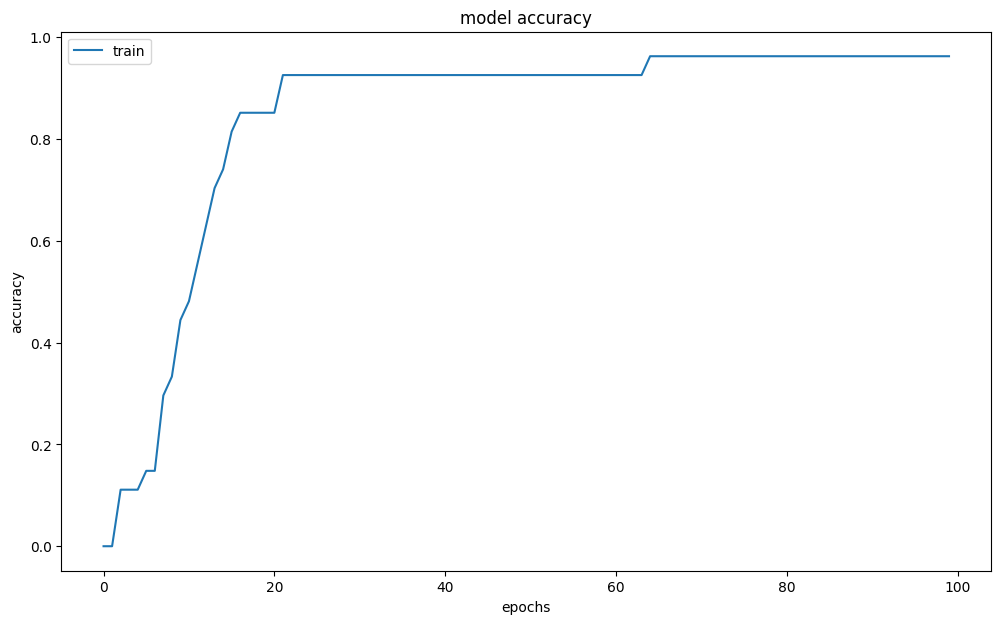

In [118]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
# we got to know that as the epochs increases the accuracy function starts increasing as well.

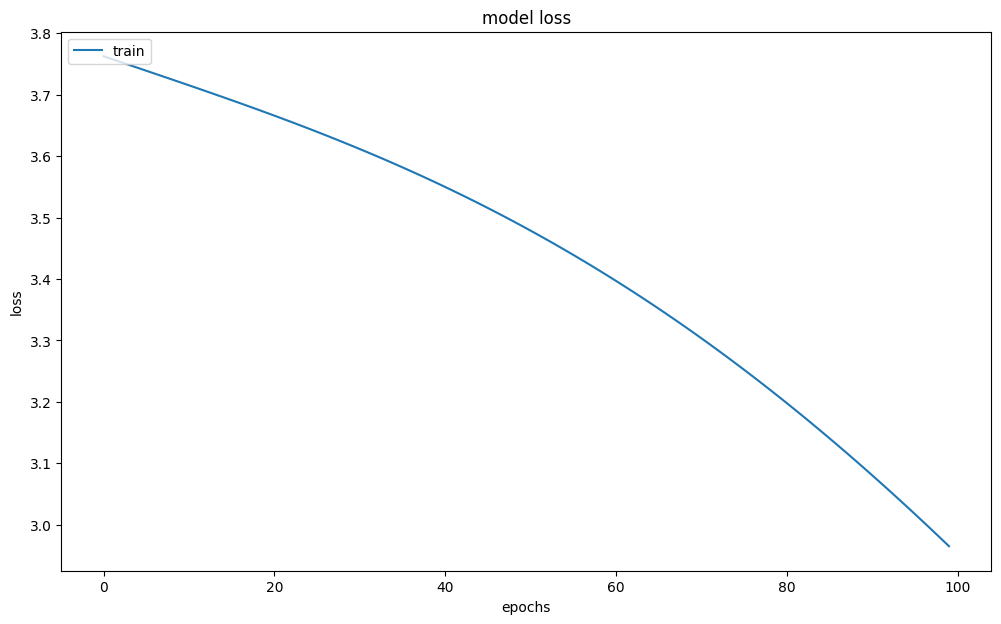

In [120]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [122]:
# we get to know, as the epochs starts increasing the loss function starts to decreasing from 3.8 to 3.0

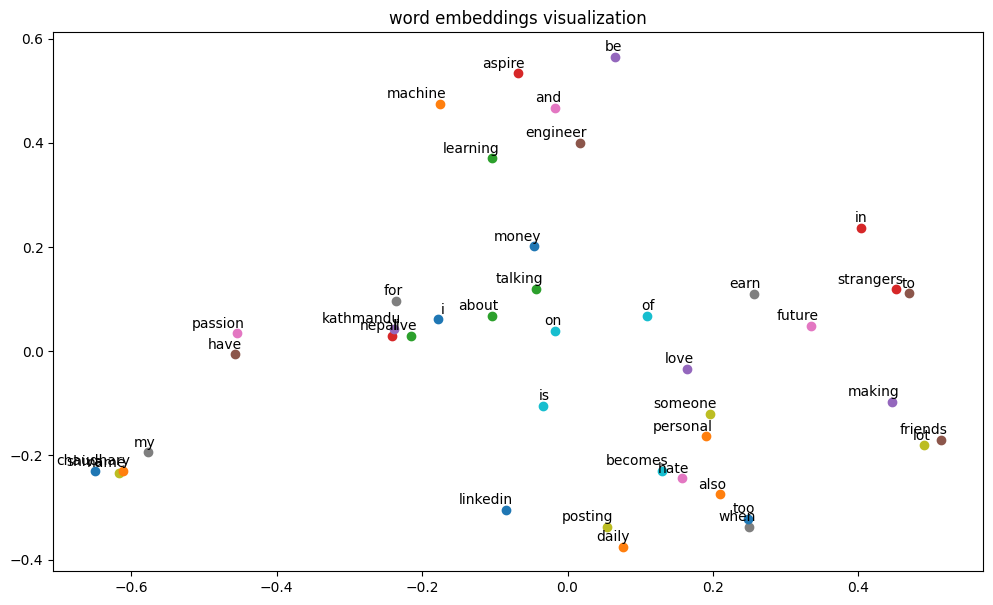

In [130]:
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 7))
for word, idx in tokenizer.word_index.items():
  X, y = reduced_embeddings[idx]
  plt.scatter(X, y)
  plt.annotate(word, xy=(X, y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
plt.title("word embeddings visualization")
plt.show()
